<a href="https://colab.research.google.com/github/AhmedHefnawy/Keras-neural-network-Multiclass-Classification/blob/master/Neural_Nerworks_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### import tools

In [31]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from google.colab import files
import io
import warnings
warnings.filterwarnings('ignore')


#### reproducibility Handling

In [2]:
# fix random seed
seed = 7
numpy.random.seed(seed)

### Load DataSet from localdrive 

In [3]:
uploaded = files.upload()


Saving IRIS.csv to IRIS.csv


In [4]:
Dataset = pd.read_csv(io.BytesIO(uploaded['IRIS.csv']))
# Dataset is now stored in a Pandas Dataset

### Summarize the Dataset
##### Now it is time to take a look at the data. with few different ways:_ __ ___ __ __ __ __ __ ___


In [12]:
Dataset.shape

(150, 5)

In [13]:
Dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [14]:
Dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
print(Dataset.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Data Visualization


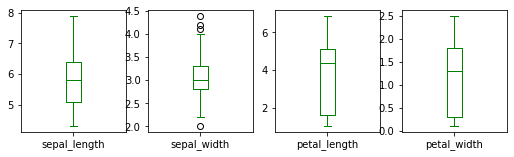

In [18]:
Dataset.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False , figsize=(11,13) , color='g')
plt.show()

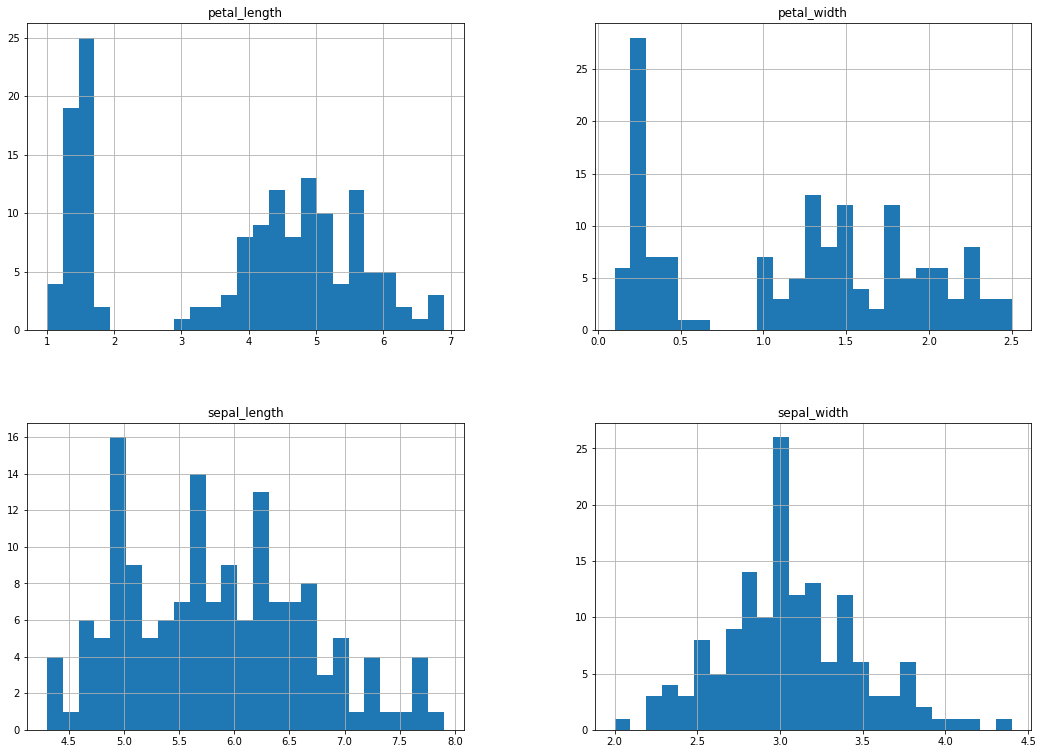

In [19]:
Dataset.hist(bins=25 ,figsize=(18,13))
plt.show()

####  Multivariate plots to better understand the relationships between attributes.
##### look at the interactions between the variables
##### scatter plots of all pairs of attributes.

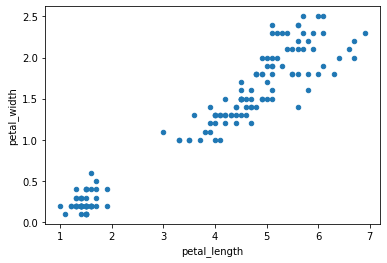

In [20]:
Dataset.plot(kind='scatter', x = 'petal_length' , y= 'petal_width')
plt.show()

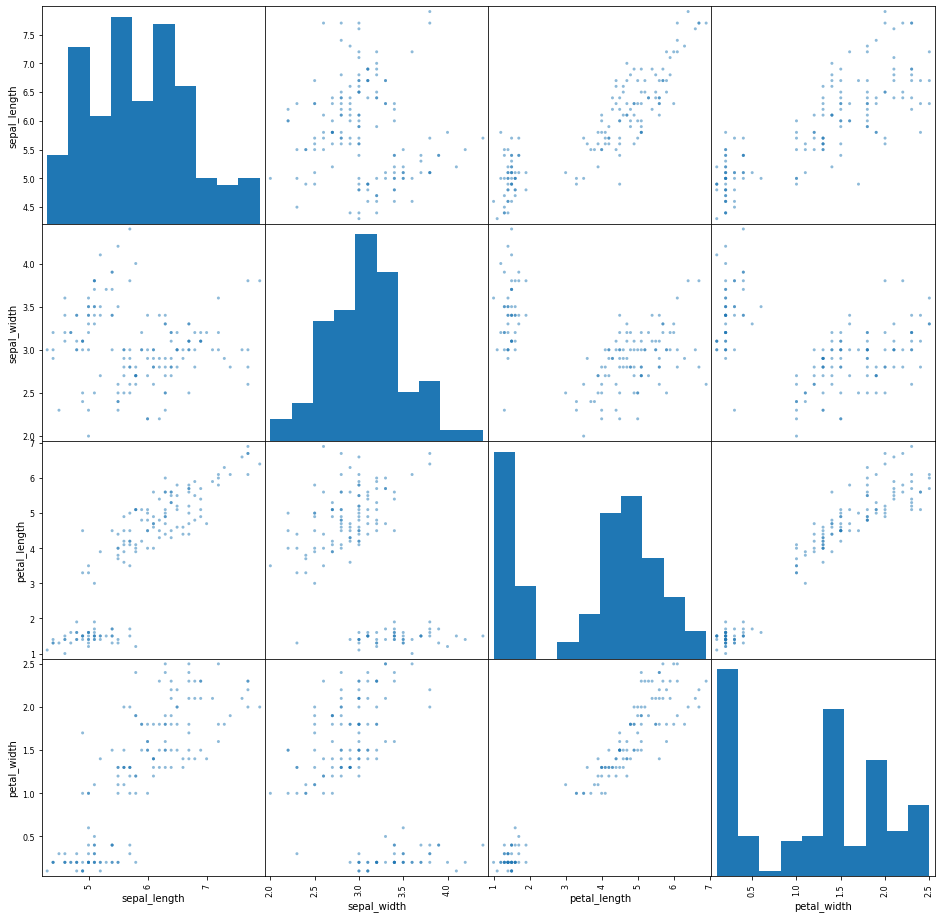

In [24]:
scatter_matrix(Dataset , figsize=(16,16))
plt.show()

#### Data PreProcessing 

#### Split DataSet into > Features (input) & Classes (Output)

In [6]:
dataFrame = Dataset.values
X = dataFrame[:,0:4].astype(float)
Y = dataFrame[:,4]

#### Encode Output Variable

In [9]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)


In [25]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

#### Define Neural Network Model

4 inputs -> [4 hidden nodes] -> 3 outputs ||||| fully connected network

In [38]:
 # create model === as basline model function
def baseline_model():
  model = Sequential()
  model.add(Dense(4, input_dim=4, init= normal , activation= relu ))
  model.add(Dense(3, init= normal , activation= sigmoid ))
  # Compile model ++++
  model.compile(loss= categorical_crossentropy , optimizer= adam , metrics=[ accuracy ])
  return model

#### Now i can create KerasClassifier for use in scikit-learn.

In [39]:
estimator = KerasClassifier(build_fn=baseline_model, nb_epoch=200, batch_size=5, verbose=0)

#### I'll try to Evaluate The Model using scikit-learn with k-Fold Cross Validation 

In [40]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [41]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)


In [48]:
print("Reslt_Mean = {} % |---| result_STD = {} \n-------------------------------\n".format(results.mean()*100, results.std()*100) )

Accuracy: 95.33% (4.27%)